In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# Ćwiczenie: czytam JSON, Załaduj zbiór IOT ze ścieżki /databricks-datasets/iot/iot_devices.json i podejrzyj go, korzystając z display.

In [0]:
path_adult = "/databricks-datasets/iot/iot_devices.json"
df_jason = spark.read.csv(path_adult)
#display(df_jason)

In [0]:
#Ćwiczenie: describe

#Odczytaj schemat z plików znajdujących się pod ścieżką /databricks-datasets/wine-quality. Dla przykładu możesz wziąć pod uwagę tylko kolor czerwony wina. Zwróć uwagę, że plik rozdzielony jest średnikami, więc będzie potrzeba użycia option przy odczycie CSV. Pamiętaj też o wymuszeniu schematu podczas odczytu i że pierwszą linijką są nazwy kolumn, a nie dane właściwe. Następnie, żeby sprawdzić, jak Ci poszło, użyj head.

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(2)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6)]

In [0]:
# Ćwiczenie: kryteria filter

# Metoda select ma zaprogramowany wytrych, który daje Ci możliwość zebrania wszystkich wierszy jednym wyrażeniem. Zastosuj to do zbioru statystyk wina, który już wcześniej obrabialiśmy. Przypominamy, znajduje się pod ścieżką /databricks-datasets/wine-quality. Zwróć DF, w którym są wina, które zawierają wysoką zawartość alkoholu, powiedzmy powyżej 13%. Ile jest takich wpisów?

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(2)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6)]

In [0]:
df_wine_high = df_wine.filter(
    df_wine["alcohol"] >= '13'
)
#display(df_wine_high)

In [0]:
df_wine.count()

6513

In [0]:
#Ćwiczenie: nowa kolumna

#Stwórz nową kolumnę dla zbioru adult, która będzie się nazywać race_lowercase i będzie zawierać — no zgadnij :) — rasę badanego człowieka pisaną małymi znakami. Zadanie dla ambitnych — możesz też przy okazji pozbyć się pustych znaków.

#Tak jak wspomniano, na początku możesz zmienić nazwę kolumny, gdy użyjesz funkcji withColumnRenamed. Pamiętaj, polecenie to nie zmodyfikuje istniejącego DF, raczej stworzy jego kopię wraz ze zmienioną nazwą.

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"
df_adult = spark.read.csv(path_adult)
df_adult_with_schema = spark.read.csv(path_adult, inferSchema=True)

In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType

fields = [
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", IntegerType(), True),

    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),

    StructField("capital-gain", IntegerType(), True),
    StructField("capital-loss", IntegerType(), True),
    StructField("hours-per-week", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("label", StringType(), True),
]

schema = StructType(fields)

df_adult = spark.read.csv(path_adult, schema=schema)

In [0]:
df_adult_race = df_adult.withColumn("race",F.lower(F.col("race")))
df_adult_race_lower = df_adult_race.withColumnRenamed("race", "race_lowercase")

#display(df_adult_race_lower)

In [0]:
# Zadanie: szukamy reguł

#W tym zadaniu zainteresujemy się tym, jak młody wiek wpływa na takie cechy jak tygodniowy czas pracy albo stan cywilny (marital-status).

# Możesz posłużyć się tym krótkim fragmentem kodu do stworzenia odpowiedniego DF.


In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult = df_adult.toDF(*field_names)

In [0]:
#Najpierw ze zbioru pozbądź się duplikatów. Potem stwórz w nim nową kolumnę – is young, która będzie zależna od wartości kolumny age.
# Niech wiek 35 będzie granicą młodości, a więc wszystkich poniżej 35 roku życia uznajemy za młodych.

# Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
#parttime (< 39 godzin).

# Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

# Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.

In [0]:
df_adult.drop_duplicates().count()

32537

In [0]:
# check
df_adult.count()

32561

In [0]:
import pyspark.sql.functions as F
df_adult = df_adult.withColumn(
    "is young",
    F.when(F.trim(F.col("age")) < "35", "young").otherwise("too_old_to_die_young")
)

#display(df_adult)

In [0]:
# Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
#parttime (< 39 godzin).

In [0]:
df_adult = df_adult.withColumn(
    "work_time",
    F.when(F.trim(F.col("hours-per-week")) > "39", "fulltime").otherwise("parttime")
)
#display(df_adult)

In [0]:
# Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

In [0]:
df_adult.groupby('is young').count().collect()

[Row(is young='young', count=14049),
 Row(is young='too_old_to_die_young', count=18512)]

In [0]:
df_young = df_adult.where(
    df_adult["is young"] == 'young'
)
#display(df_young)

In [0]:
df_too_old_to_die_young = df_adult.where(
    df_adult["is young"] == 'too_old_to_die_young'
)
#display(df_too_old_to_die_young)

In [0]:
# Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? 
# Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.


In [0]:
# 1. Czas pracy 

In [0]:
df_young_pandas = df_young.toPandas()
young = df_young_pandas['work_time'].value_counts()
young

fulltime 9963
parttime 4086
Name: work_time, dtype: int64

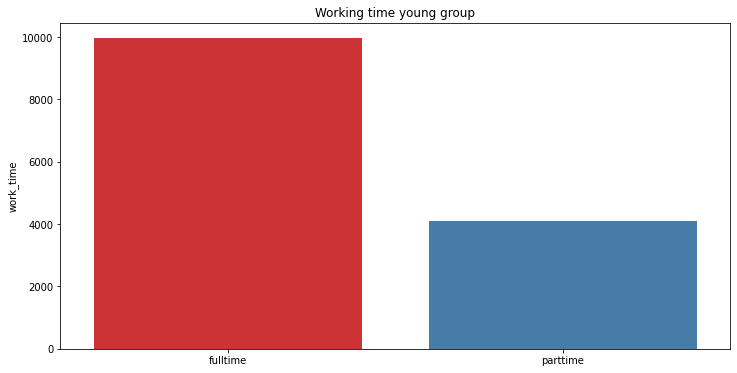

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title ('Working time young group')
sns.barplot(x=young.index, y= young, palette='Set1');

In [0]:
# W grupie młodych ok 14 k pracowników, na pełnym etacie pracowało 9963 co stanpwiło ok 60 % pracowników młodych
# do ok 40 procent 4086 pracowników pracująych na umowach czasowych  

In [0]:
df_olders_pandas = df_too_old_to_die_young.toPandas()
olders = df_olders_pandas['work_time'].value_counts()
olders

fulltime 15202
parttime 3310
Name: work_time, dtype: int64

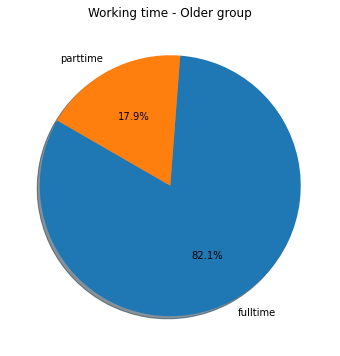

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title ('Working time - Older group')
plt.pie(olders,labels= olders.index, autopct='%1.1f%%',startangle=150,shadow=True);

In [0]:
# W grupie liczniejszej starszych ok 18 500 pracowników, na pełnym etacie pracowało 15202 co stanpwiło ok 82 % pracowników starszych
# do ok 18 % procent 3310 pracowników pracująych na umowach czasowych.  

In [0]:
# Graupa starszych pracowników była liczniejsza oraz częściej pracowała na pełnym etacie. 40 procent pracowników młodych pracowało na umowach czasowych, do ok. 18 % pracowników starszych 

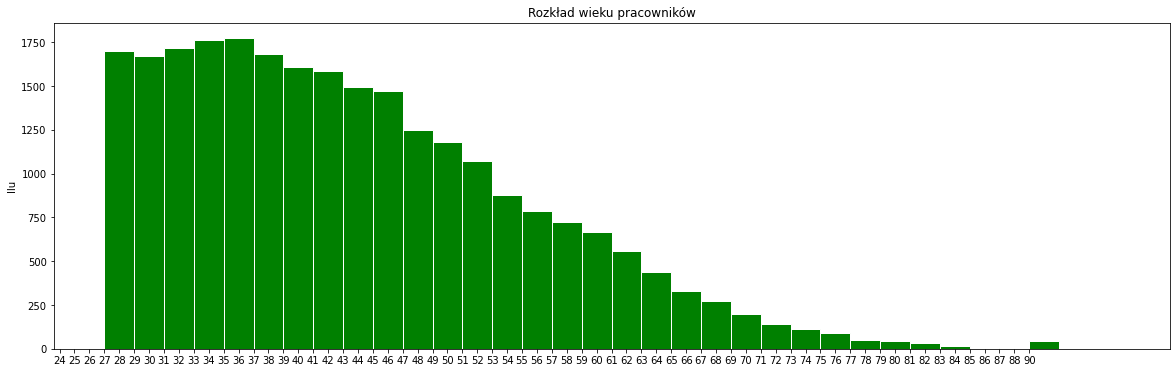

In [0]:
import numpy as np
df_adults_pandas = df_adult.toPandas()
df3 = df_adults_pandas.sort_values(by='age',ascending=True)  
plt.figure(figsize=(20,6))
plt.title ('Rozkład wieku pracowników')
plt.ylabel('Ilu')
plt.hist(df3.age, bins = np.arange(10,80,2), color='green', edgecolor = 'white');


In [0]:
#W wieku globalnym pracowników powyżej najwyższe zatrdunienie powyżej 1000 przypadło w grupie od 27 dp 47 lat,
#najwięcej pracowników było wieku od 35 do 37 lat 

In [0]:
#2. Status Małżeński

In [0]:
status_young = df_young_pandas['marital-status'].value_counts()
status_young

Never-married 8536
 Married-civ-spouse 3975
 Divorced 970
 Separated 373
 Married-spouse-absent 150
 Widowed 29
 Married-AF-spouse 16
Name: marital-status, dtype: int64

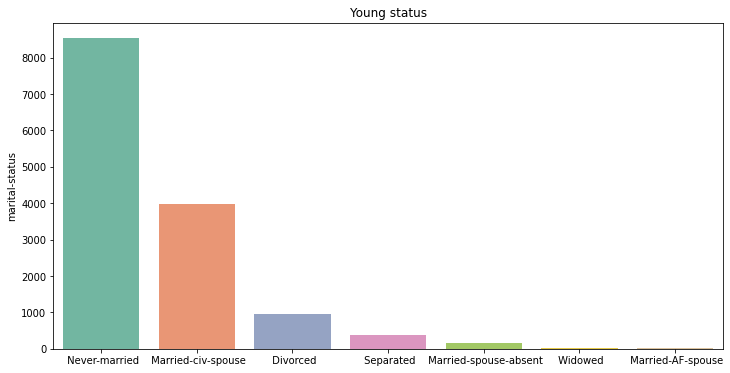

In [0]:
plt.figure(figsize=(12,6))
plt.title ('Young status')
sns.barplot(x=status_young.index, y= status_young, palette='Set2');

In [0]:
status_older = df_olders_pandas['marital-status'].value_counts()
status_older

Married-civ-spouse 11001
 Divorced 3473
 Never-married 2147
 Widowed 964
 Separated 652
 Married-spouse-absent 268
 Married-AF-spouse 7
Name: marital-status, dtype: int64

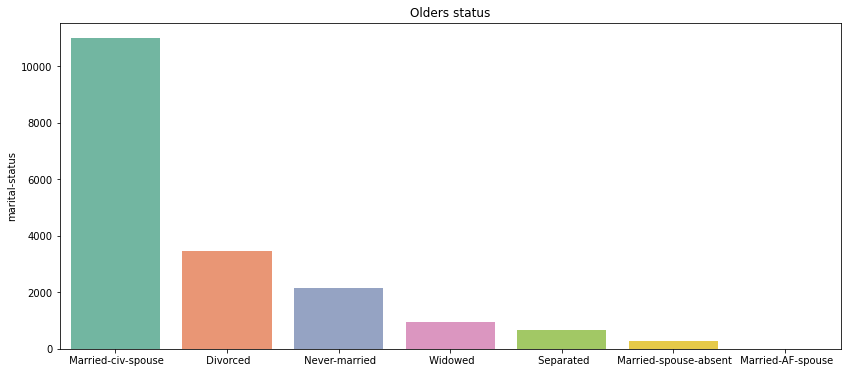

In [0]:
plt.figure(figsize=(14,6))
plt.title ('Olders status')
sns.barplot(x=status_older.index, y= status_older, palette='Set2');

In [0]:
# W grupie młodszej dominowali single w przeciwieństwie do grupy starszych gdzie większość osób była w związku. Grupa singli dominująca wsród młodych stała się grupą niszową z wiekiem.  